<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          Dataset for images</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       In this notebook, we are going to build a dataset objects for images. Then we will apply pre-build transforms for
       Torchvision Transforms to the dataset.
   </font>
</p>

### Importing Required Modules

In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
# Sets the underlying random value. Due to which get same results everytime
torch.manual_seed(0)

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Loading and Displaying the Data</span>

In [3]:
# Download dataset from
# https://www.kaggle.com/datasets/sanjeet41/fashionmnist-train/data
image_data_df = pd.read_csv("data/fashion-mnist_train.csv")
image_data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels_mapping = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
                 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
labels_list = image_data_df["label"].to_list()
labels_data = [labels_mapping[i] if i in labels_mapping else "NA" for i in labels_list]
image_data_df.insert(1, "item_name", labels_data)
image_data_df.head()

,label,item_name,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,Pullover,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Ankle boot,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Shirt,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,0,T-shirt/top,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,Dress,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Seperating Pixcels from main data frame
pixel_df = image_data_df.drop(["label", "item_name"], axis=1)
X = np.array(pixel_df)
X.shape

(60000, 784)

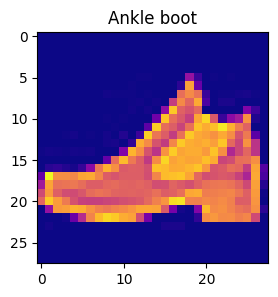

In [6]:
# Displaying an image using pixcel information(or array)
index = 1 # Ankle Boot
image = X[index].reshape(28, 28)
plt.figure(figsize=(3,3))
plt.title(image_data_df.iloc[index, 1])
plt.imshow(image, cmap="plasma")

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Creating a Dataset Class</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       In this section, we create a custom dataset class 
   </font>
</p>

In [7]:
class ImageDataset(Dataset):
    def __init__(self, images_df, transform=None):
        self.images_df = images_df
        self.transform = transform
        self.length = images_df.shape[0]
    
    # NOTE: To know more about below functions study chapter:4
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        """It should return image name and pixel along with any provided transformation"""
        image_pixels = self.images_df.iloc[idx, 2:].to_numpy(dtype=int).reshape(28, 28)
        image_name = self.images_df.iloc[idx, 1]
        if self.transform:
            # Transformer expecting it to PIL images. So, converting pixels to image
            image = Image.fromarray(image_pixels)
            transformed_image = self.transform(image)
            image_pixels = np.array(transformed_image).reshape(28, 28) 
        return image_pixels, image_name

In [8]:
images_dataset = ImageDataset(image_data_df)

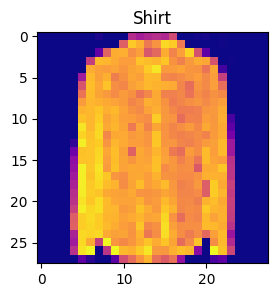

In [9]:
image_pixels = images_dataset[2][0]
image_name = images_dataset[2][1]
plt.figure(figsize=(3, 3))
plt.title(image_name)
plt.imshow(image_pixels,  cmap="plasma")

#### With Dataloader

In [10]:
# We can also use dataloader class with dataset object
data_loader = DataLoader(images_dataset, batch_size=2, shuffle=True)

In [11]:
for pixels, images in data_loader:
    print(f"Pixels: {pixels}", end="\n\n")
    print(f"Images Names: {images}")
    break

Pixels: tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int32)

Images Names: ('Trouser', 'Shirt')


In [12]:
# Our dataset has 60000 examples, each 2 * 30000(batches) = 60000
len(data_loader)

30000

#### Transformations

In [13]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])

In [14]:
images_dataset = ImageDataset(image_data_df, transform=fliptensor_data_transform)

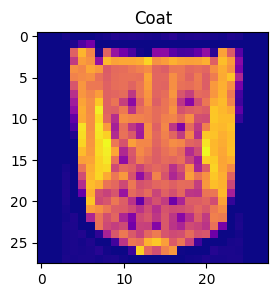

In [15]:
image_pixels = images_dataset[5][0]
image_name = images_dataset[5][1]
plt.figure(figsize=(3, 3))
plt.title(image_name)
plt.imshow(image_pixels,  cmap="plasma")